In [10]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
# Read grayscale image
img = cv2.imread('digit.png', cv2.IMREAD_GRAYSCALE)

print("Resolution: ", img.shape)
print("Range: %d - %d " % (img.min(), img.max()))

Resolution:  (28, 28)
Range: 0 - 255 


In [12]:
# Normalize to [0,1]
img = img.astype(np.float)/255

C:\Users\imith\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


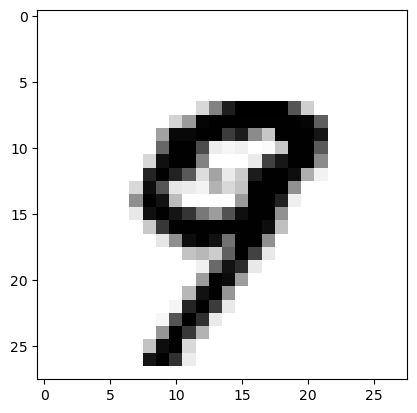

In [13]:
# Show image
plt.imshow(img, cmap='gray_r')

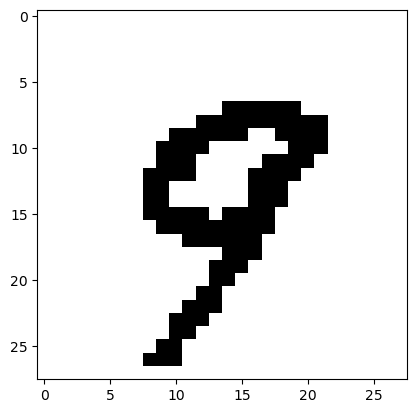

In [14]:
# Convert to binary with thresholding
_, img = cv2.threshold(img, 0.5, 1, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(img, cmap='gray_r') # gray_r colormap shows 1 as black

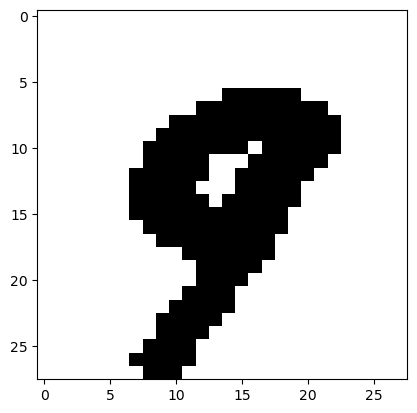

In [15]:
# Create morphological kernel
kern = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=np.uint8)

# Perform dilation
dilated_img = cv2.dilate(img, kern)
plt.imshow(dilated_img, cmap='gray_r') # gray_r colormap shows 1 as black

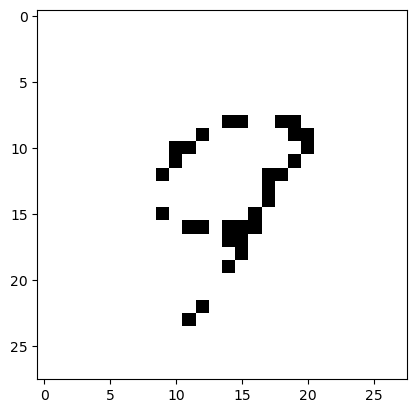

In [16]:
# Erosion
eroded_img = cv2.erode(img, kern)
plt.imshow(eroded_img, cmap='gray_r') # gray_r colormap shows 1 as black

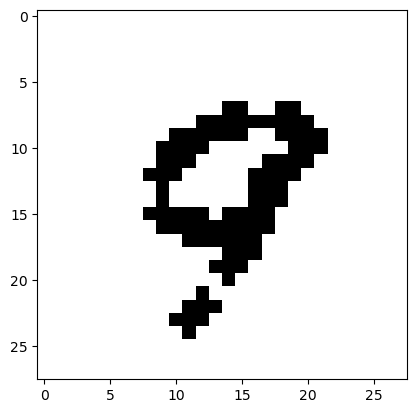

In [17]:
# Opening
opened_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kern)
plt.imshow(opened_img, cmap='gray_r') # gray_r colormap shows 1 as black

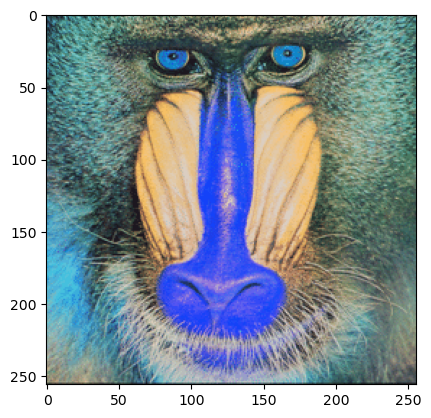

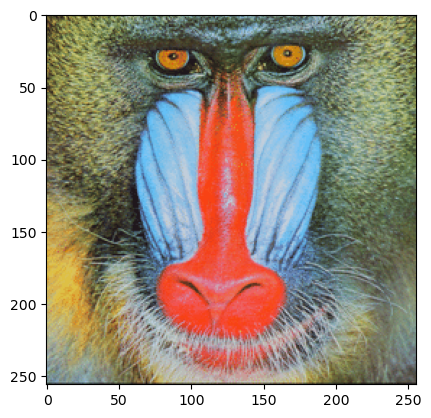

In [18]:
# Read colored image
img = cv2.imread('baboon.png')

# Show image
plt.figure()
plt.imshow(img)

# Convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.figure()
plt.imshow(img)

In [19]:
# Convert from rgb to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Convert to float and scale from 0 to 1
img_gray = img_gray.astype(np.float)/255

C:\Users\imith\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [21]:
sigma = 2
n = int(2*np.ceil(3*sigma)+1)
gauss1D = cv2.getGaussianKernel(n, sigma) # Column vector
gauss2D = gauss1D @ gauss1D.T # Symmetric gaussian kernel
img_smooth = cv2.filter2D(img_gray, -1, gauss2D)
print(gauss1D.shape, gauss1D.T.shape, gauss2D.shape)

(13, 1) (1, 13) (13, 13)


In [22]:
sigma = 4
n = int(2*np.ceil(3*sigma)+1)
gauss1D = cv2.getGaussianKernel(n, sigma) # Column vector
gauss2D = gauss1D @ gauss1D.T # Symmetric gaussian kernel
img_smooth_2 = cv2.filter2D(img_gray, -1, gauss2D)

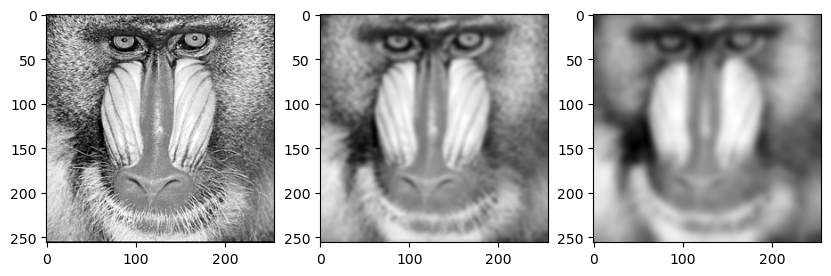

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (10,40))
ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(img_smooth, cmap='gray')
ax[2].imshow(img_smooth_2, cmap='gray')